In [1]:
from region_utils.region import Subdomain, Domain
from region_utils.shapes import ConvexPolygon
import jax.numpy as np

In [2]:
total_vertices = np.asarray(
    [
        [0, 0],
        [0, 1],
        [1, 1],
        [1, 0],
        [0.25, 0.25],
        [0.25, 0.75],
        [0.75, 0.75],
        [0.75, 0.25],
    ]
)

region_idxs = np.asarray([[0, 1, 2, 3], [4, 5, 6, 7]])
boundary_idxs = [[0, 1, 2, 3], []]

In [3]:
subdoms = [
    Subdomain([ConvexPolygon(total_vertices[region_idxs[i]], boundary_idxs[i])])
    for i in range(2)
]

domain = Domain(subdoms)

In [4]:
domain.create_interior(400, [0, 0], [1, 1])
domain.create_boundary(40)

idx = [4, 5, 6, 7, 4]
for i in range(4):
    domain.create_interface(
        10,
        (0, 1),
        (total_vertices[idx[i]], total_vertices[idx[i + 1]]),
    )

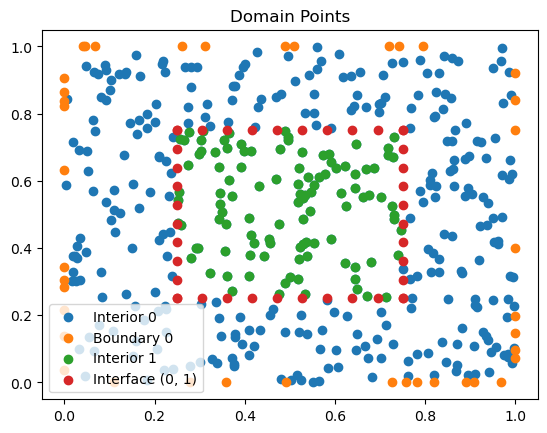

In [5]:
domain.plot()

In [6]:
from utils import data_path

domain.write_to_file(data_path / "poisson_train.json")

/Users/augustfemtehjell/opt/miniconda3/envs/FYS5429/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


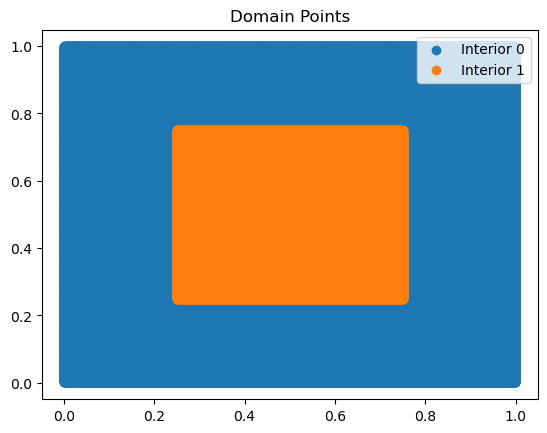

In [7]:
domain.create_testing_data(1000, [0, 0], [1, 1])
domain.write_to_file(data_path / "poisson_test.json", False)
domain.plot(False)